In [1]:
import tensorflow as tf
import keras 
from tensorflow.keras.datasets import cifar100
# from tensorflow.keras.utils import to_categorical
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Activation,Dense,Flatten
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import optimizers
from tensorflow.keras.losses import sparse_categorical_crossentropy, categorical_crossentropy


Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode = "fine")

#Split them into train & test
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
# y_train, y_test = to_categorical(y_train), to_categorical(y_test)



In [3]:
print("x_train.shape:", x_train.shape)
print("y_train.shape", y_train.shape)
print(y_test.shape)
print(x_test.shape)

x_train.shape: (50000, 32, 32, 3)
y_train.shape (50000,)
(10000,)
(10000, 32, 32, 3)


In [4]:
# number of classes
K = len(set(y_train))
print("number of classes:", K)

number of classes: 100


In [277]:
# i = Input(shape=x_train[0].shape)

# x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
# x = BatchNormalization()(x)
# x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
# x = BatchNormalization()(x)
# x = MaxPooling2D((2, 2))(x)

# x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
# x = BatchNormalization()(x)
# x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
# x = BatchNormalization()(x)
# x = MaxPooling2D((2, 2))(x)

# x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
# x = BatchNormalization()(x)
# x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
# x = BatchNormalization()(x)
# x = MaxPooling2D((2, 2))(x)

# x = Flatten()(x)
# x = Dropout(0.2)(x)
# x = Dense(1024, activation='relu')(x)
# x = Dropout(0.2)(x)
# x = Dense(K, activation='softmax')(x)

# model = Model(i, x)

## Model

In [5]:
model=Sequential()
model.add(layers.Conv2D(32,
                            (3,3),
                            activation='relu',
                            padding='same',
                            input_shape= (x_train[0].shape)))
    #model.add(Activation('relu'))
model.add(layers.Conv2D(64,
                            (3,3),
                            padding='same',
                            activation='relu'))
model.add(layers.MaxPool2D())
model.add(layers.Conv2D(128,
                            (3,3),
                            padding='same',
                            activation='relu'))
model.add(layers.MaxPool2D())
# model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(256,
                            (3,3),
                            padding='same',
                            activation='relu'))
model.add(layers.MaxPool2D())
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(100,activation='softmax'))
model.summary();

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 256)         0

## Modeli Compile Etme

In [7]:
# Note: make sure you are using the GPU for this.
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Modeli Eğitme

In [168]:
steps_per_epoch = x_train.shape[0] // 32
history =  model.fit(x_train, y_train, validation_data=(x_test, y_test), steps_per_epoch=int(2500/32),epochs=15)

Epoch 1/15
78/78 [==============================] - 19s 201ms/step - loss: 0.4181 - accuracy: 0.8850 - val_loss: 5.9374 - val_accuracy: 0.4505
Epoch 2/15
78/78 [==============================] - 13s 171ms/step - loss: 0.0678 - accuracy: 0.9778 - val_loss: 6.5834 - val_accuracy: 0.4616
Epoch 3/15
78/78 [==============================] - 13s 168ms/step - loss: 0.0184 - accuracy: 0.9949 - val_loss: 6.8383 - val_accuracy: 0.4670
Epoch 4/15
78/78 [==============================] - 13s 170ms/step - loss: 0.0093 - accuracy: 0.9982 - val_loss: 7.0889 - val_accuracy: 0.4671
Epoch 5/15
78/78 [==============================] - 13s 169ms/step - loss: 0.0045 - accuracy: 0.9991 - val_loss: 7.1988 - val_accuracy: 0.4710
Epoch 6/15
78/78 [==============================] - 14s 174ms/step - loss: 0.0024 - accuracy: 0.9996 - val_loss: 7.3080 - val_accuracy: 0.4725
Epoch 7/15
78/78 [==============================] - 14s 174ms/step - loss: 0.0023 - accuracy: 0.9996 - val_loss: 7.3603 - val_accuracy: 0.4733

In [169]:
scores = model.evaluate(x_test,y_test,verbose=0)

In [170]:
print("Accuracy = %.2f" %scores[1])

Accuracy = 0.47


## Loss ve val_Loss Graafikleri

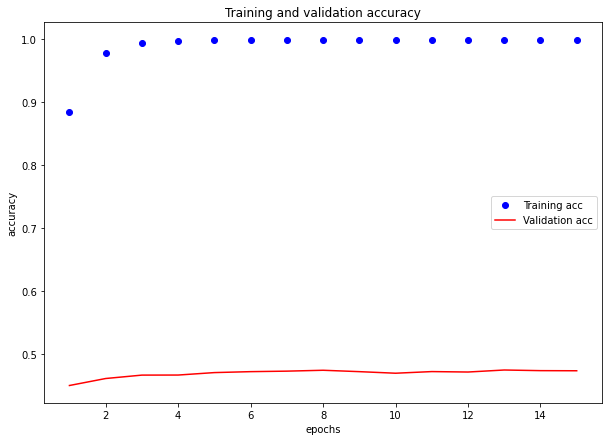

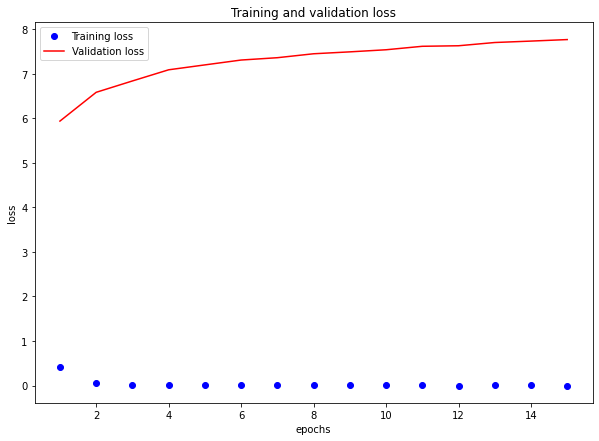

In [171]:
plt.rcParams['figure.figsize'] = [10,7]#0,7
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# import numpy as np

np.save('history1.npy',(acc,val_acc,loss,val_loss))
(acc,val_acc,loss,val_loss)=np.load('history1.npy')

epochs = range(1,len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

plt.show()


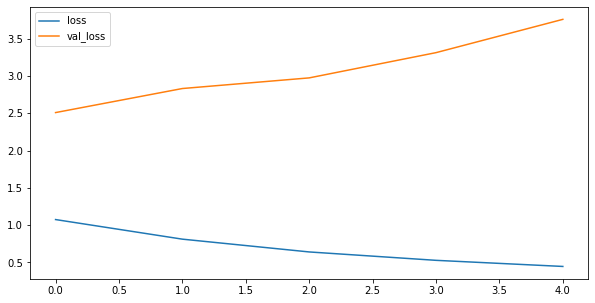

In [113]:
# plt.rcParams['figure.figsize'] = [10,5]
# plt.plot(history.history['loss'], label='loss')
# plt.plot(history.history['val_loss'], label='val_loss')
# plt.legend()

## Acc ve val_acc Grafikleri

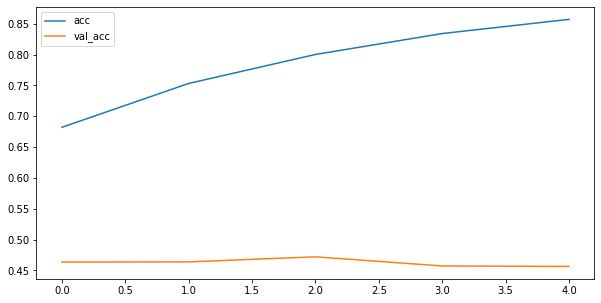

In [114]:
# # Plot accuracy per iteration
# plt.plot(history.history['accuracy'], label='acc')
# plt.plot(history.history['val_accuracy'], label='val_acc')
# plt.legend()

## DataGenerator İşlemleri

In [172]:
batch_size = 32
data_generator = ImageDataGenerator(rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      vertical_flip=True,
      fill_mode='nearest')

train_generator = data_generator.flow(x_train, y_train,batch_size)
validation_generator = data_generator.flow(x_test, y_test,batch_size)
steps_per_epoch = x_train.shape[0] // batch_size
history = model.fit(train_generator, validation_data=validation_generator,steps_per_epoch=int(2500/32),validation_steps = int(500/32),epochs=15)

Epoch 1/15
78/78 [==============================] - 2s 29ms/step - loss: 4.8069 - accuracy: 0.0104 - val_loss: 4.6051 - val_accuracy: 0.0104
Epoch 2/15
78/78 [==============================] - 2s 28ms/step - loss: 4.6050 - accuracy: 0.0084 - val_loss: 4.6040 - val_accuracy: 0.0125
Epoch 3/15
78/78 [==============================] - 2s 31ms/step - loss: 4.6059 - accuracy: 0.0112 - val_loss: 4.6074 - val_accuracy: 0.0125
Epoch 4/15
78/78 [==============================] - 2s 28ms/step - loss: 4.6063 - accuracy: 0.0112 - val_loss: 4.6056 - val_accuracy: 0.0125
Epoch 5/15
78/78 [==============================] - 2s 28ms/step - loss: 4.6053 - accuracy: 0.0132 - val_loss: 4.6060 - val_accuracy: 0.0104
Epoch 6/15
78/78 [==============================] - 2s 29ms/step - loss: 4.6058 - accuracy: 0.0128 - val_loss: 4.6052 - val_accuracy: 0.0021
Epoch 7/15
78/78 [==============================] - 2s 30ms/step - loss: 4.6056 - accuracy: 0.0092 - val_loss: 4.6052 - val_accuracy: 0.0104
Epoch 8/15
78

In [173]:
scores = model.evaluate(validation_generator,verbose=0)

In [174]:
print("Accuracy = %.2f" %scores[1])

Accuracy = 0.01


## Düzenlenmiş Loss ve val_Loss Graafikler

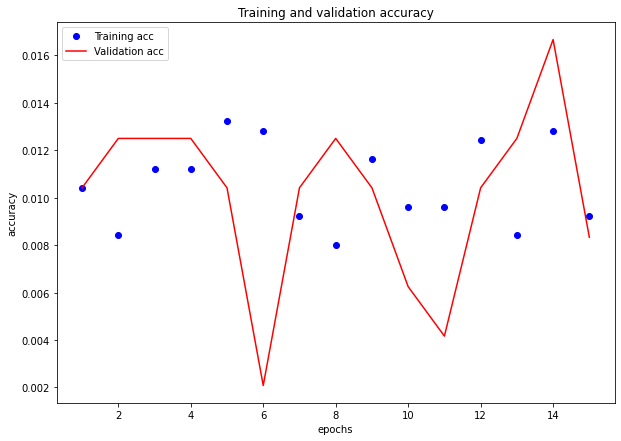

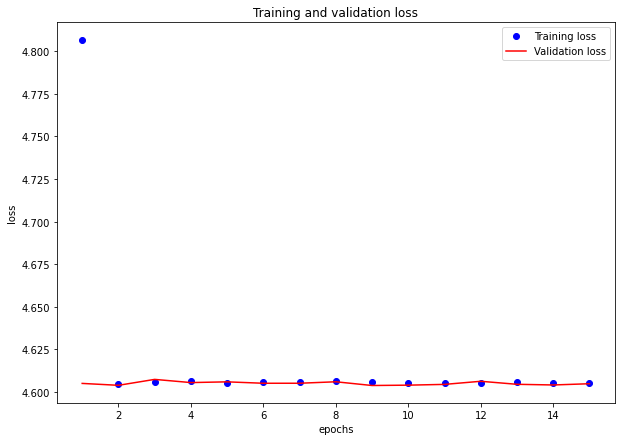

In [175]:
plt.rcParams['figure.figsize'] = [10,7]#0,7
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# import numpy as np

np.save('history1.npy',(acc,val_acc,loss,val_loss))
(acc,val_acc,loss,val_loss)=np.load('history1.npy')

epochs = range(1,len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

plt.show()


In [161]:
# plt.rcParams['figure.figsize'] = [10,5]
# plt.plot(history.history['loss'], label='loss')
# plt.plot(history.history['val_loss'], label='val_loss')
# plt.legend()

## Düzenlenmiş Acc ve val_Acc Graafikler

In [162]:
# # Plot accuracy per iteration
# plt.plot(history.history['accuracy'], label='acc')
# plt.plot(history.history['val_accuracy'], label='val_acc')
# plt.legend()

## Plot confusion matrix

Confusion matrix, without normalization
[[68  1  0 ...  0  0  0]
 [ 0 51  1 ...  1  0  0]
 [ 0  0 30 ...  2  3  0]
 ...
 [ 0  0  0 ... 39  0  0]
 [ 0  1  5 ...  0 18  0]
 [ 0  1  1 ...  0  0 42]]


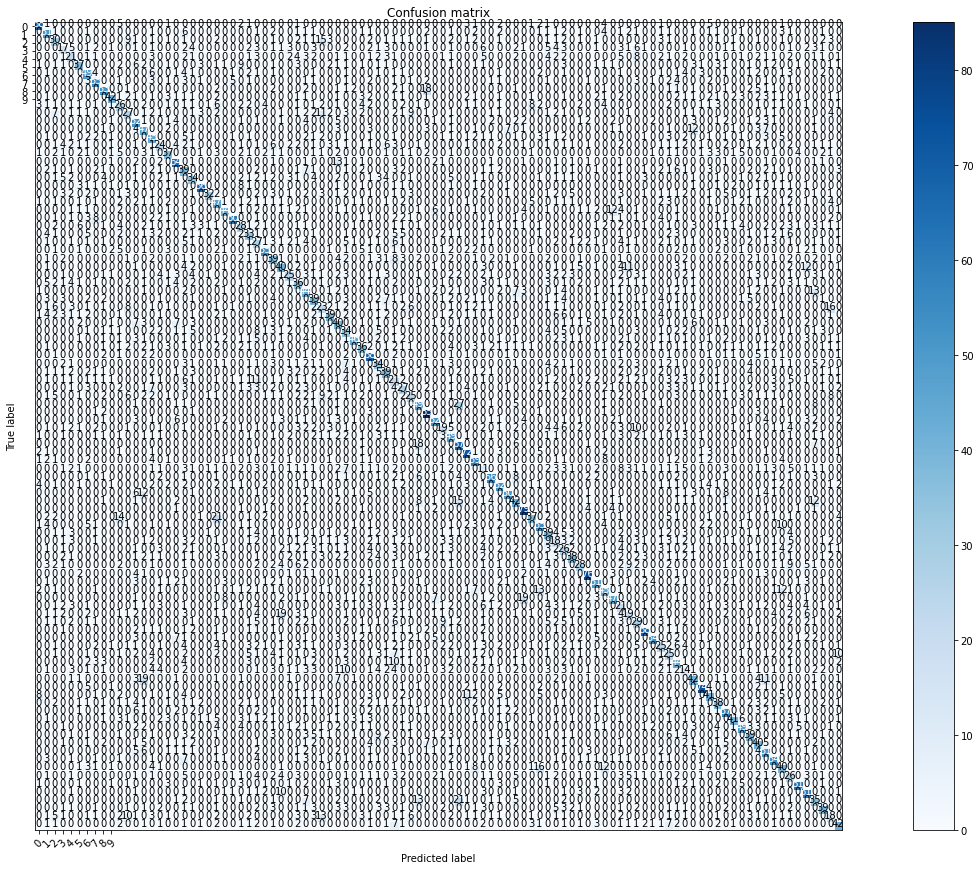

In [176]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools
plt.rcParams['figure.figsize'] = [20,12]#0,7

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


predict_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, predict_test)
plot_confusion_matrix(cm,list(range(10)))

# Labels

In [177]:
labels = '''apple
aquarium_fish 
baby
bear
beaver
bed
bee
beetle
bicycle
bottle
bowl
boy
bridge
bus
butterfly
camel
can
castle
caterpillar
cattle
chair
chimpanzee
clock
cloud
cockroach
couch
crab
crocodile
cup
dinosaur
dolphin
elephant
flatfish
forest
fox
girl
hamster
house
kangaroo
keyboard
lamp
lawn_mower
leopard
lion
lizard
lobster
man
maple_tree
motorcycle
mountain
mouse
mushroom
oak_tree
orange
orchid
otter
palm_tree
pear
pickup_truck
pine_tree
plain
plate
poppy
porcupine
possum
rabbit
raccoon
ray
road
rocket
rose
sea
seal
shark
shrew
skunk
skyscraper
snail
snake
spider
squirrel
streetcar
sunflower
sweet_pepper
table
tank
telephone
television
tiger
tractor
train
trout
tulip
turtle
wardrobe
whale
willow_tree
wolf
woman
worm
'''.split()

# Doğru tahminleri kontrol edin

2174
crab
26
26


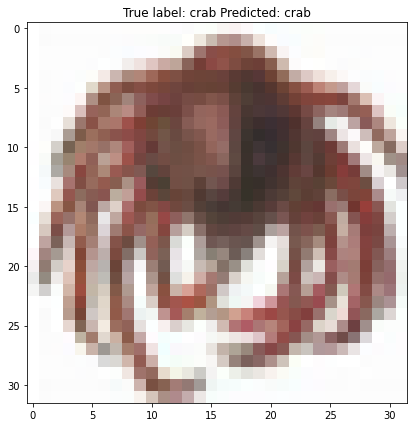

In [178]:
plt.rcParams['figure.figsize'] = [10,7]#0,7
misclassified_idx = np.where(predict_test == y_test)[0]
i = np.random.choice(misclassified_idx)
while labels[y_test[i]] != "crab" :
    i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')

plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[predict_test[i]]));


print(i)
print(labels[y_test[i]])
print(y_test[i])
print(p_test[i])
# 1 - forest 

# tiger - 3179 - 691
# forest - 4608

# Yanlış tiketlerin Tahmini

8474
turtle
93
99


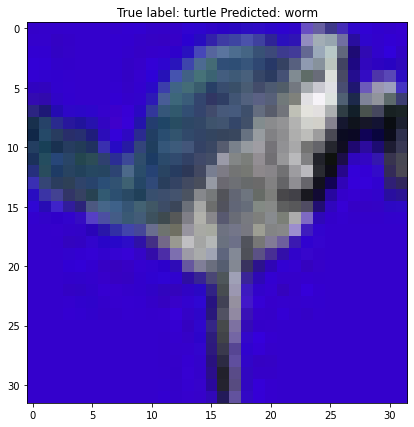

In [125]:
plt.rcParams['figure.figsize'] = [10,7]#0,7
misclassified_idx = np.where(predict_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[predict_test[i]]));

print(i)
print(labels[y_test[i]])
print(y_test[i])
print(p_test[i])
# 1 - forest 

<function matplotlib.pyplot.show(close=None, block=None)>

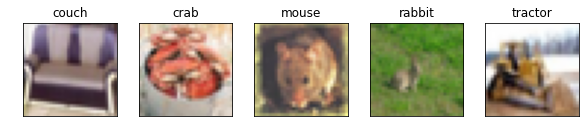

In [179]:
classlist = ["couch","crab","mouse","rabbit","tractor"]
plt.figure(figsize=(10,10))
for k in range(5): 
    misclassified_idx = np.where(predict_test == y_test)[0]
    a = np.random.choice(misclassified_idx)
    while labels[y_test[a]] != classlist[k]:
        a = np.random.choice(misclassified_idx)
    cifar_img=plt.subplot(5,5,k+1)
    plt.imshow(x_test[a])
    # Erase the value of a tick
    plt.xticks(color="None")
    plt.yticks(color="None")
    # Erase the tick x-axis and y-axis
    plt.tick_params(length=0)
    # Image Prediction pred:がモデルから予測された結果、ans:が正解
    plt.title("%s" % (labels[predict_test[a]]));
    
plt.show

IndexError: list index out of range

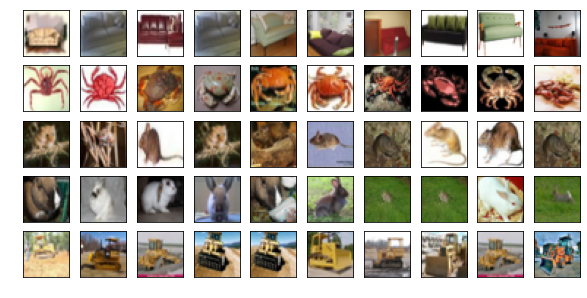

In [180]:
classlist = [" ","couch","crab","mouse","rabbit","tractor"]
plt.figure(figsize=(10,10))
i = 0
k = 0
for j in range(1,7): 
    while k*10 < j*10:
        misclassified_idx = np.where(predict_test == y_test)[0]
        a = np.random.choice(misclassified_idx)
        while labels[y_test[a]] != classlist[j]:
            a = np.random.choice(misclassified_idx)
        cifar_img=plt.subplot(10,10,i+1)
        plt.imshow(x_test[a])
        # Erase the value of a tick
        plt.xticks(color="None")
        plt.yticks(color="None")
        # Erase the tick x-axis and y-axis
        plt.tick_params(length=0)
        # Image Prediction pred:がモデルから予測された結果、ans:が正解
#         plt.title("%s" % (labels[p_test[a]]));
        i+=1
        if i == (k+1)*10 :
            k+=1
plt.show